In [1]:
#LOAD NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
#LOAD DATASET

dataset = pd.read_csv('./ChannelDataset.csv')
dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
0,12669,9656,7561,214,2674,1338,3,2
1,7057,9810,9568,1762,3293,1776,3,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,3,1
4,22615,5410,7198,3915,1777,5185,3,2


In [3]:
#SHOW KEY STATISTICS

dataset.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.543182,1.322727
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.774272,0.468052
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000,1.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,3.000000,1.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000,2.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000,2.000000


In [4]:
#TUKEY METHOD

# IMPORT REQUIRED LIBRARIES
from collections import Counter

# OUTLIER DETECTION
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # ITERATE OVER FEATURES(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # OUTLIER STEP
        outlier_step = 1.5 * IQR
        
        # DETERMINE A LIST OF INDICES OF OUTLIERS FOR FEATURE COLUMN
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # APPEND THE FOUND OUTLIER INDICES FOR COL TO THE LIST OF OUTLIER INDICES 
        outlier_indices.extend(outlier_list_col)
        
    # SELECT OBSERVATIONS CONTAINING MORE THAN 2 OUTLIERS 
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# LIST OF OUTLIERS

Outliers_to_drop = detect_outliers(dataset.drop('Channel',axis=1),0,list(dataset.drop('Channel',axis=1)))
dataset.drop('Channel',axis=1).loc[Outliers_to_drop]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
29,43088,2100,2609,1200,1107,823,3
39,56159,555,902,10002,212,2916,3
47,44466,54259,55571,7782,24171,6465,3
52,40721,3916,5876,532,2587,1278,3
87,43265,5025,8117,6312,1579,14351,3
...,...,...,...,...,...,...,...
202,25203,11487,9490,5065,284,6854,1
218,18,7504,15205,1285,4797,6372,1
372,3884,3801,1641,876,397,4829,3
409,8708,3634,6100,2349,2123,5137,3


In [5]:
#CREATE NEW DATASETS WITHOUT OUTLIERS

good_data = dataset.drop(dataset.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             332 non-null    int64
 1   Milk              332 non-null    int64
 2   Grocery           332 non-null    int64
 3   Frozen            332 non-null    int64
 4   Detergents_Paper  332 non-null    int64
 5   Delicassen        332 non-null    int64
 6   Region            332 non-null    int64
 7   Channel           332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [6]:
#CREATE PROFILE REPORT
    
#IMPORTING PACKAGE
import pandas_profiling as pp
from IPython.display import IFrame
 
# PROFILE REPORT
ChannelReport = pp.ProfileReport(dataset)
ChannelReport.to_file('ChannelReport.html')
display(IFrame('ChannelReport.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#CREATE X AND Y VARIABLES 

x = good_data.drop('Channel', axis=1).to_numpy()
Y = good_data['Channel'].to_numpy()

#CREATE TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

#MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
#FEATURE SELECTION USING SelectfromMODEL

from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000, random_state=100)
clf.fit(x_train2,y_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_names = dataset.drop('Channel',axis=1).columns[feature_idx]
print('\nKey Features:',feature_names)


Key Features: Index(['Milk', 'Grocery', 'Detergents_Paper'], dtype='object')


In [9]:
#PREPARE FOR MODELS FOR COMPARISONS

#CREATE X AND Y VARIABLES
x2 = good_data[feature_names].to_numpy()
Y2 = good_data['Channel'].to_numpy()

#CREATE TRAIN AND TEST DATASETS (New Dataset)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#FIX THE IMBALANCED CLASSES USING SMOTE
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)

#SCALE THE DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train_smt)
x_test3 = sc.transform(x_test2)

In [10]:
#CLASS BALANCE

print('Train Data - Class Split')
num_one = (y_train_smt == 1).sum()
num_two = (y_train_smt == 2).sum()
print('Channel 1 -', num_one)
print('Channel 2 -', num_two)

Train Data - Class Split
Channel 1 - 189
Channel 2 - 189


In [11]:
#CONSTRUCT SOME PIPELINES

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#CREATE PIPELINE

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000,
                                               random_state=100))])
pipeline.insert(1,pipe_logreg)

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(0,pipe_rdf)

# SET GRID SERACH PARAMS 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(1,param_gridlogreg)

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(0,param_gridrdf)

In [12]:
#DEFINE PLOT FOR LEARNING CURVE

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

Random Forest - Learning Curve


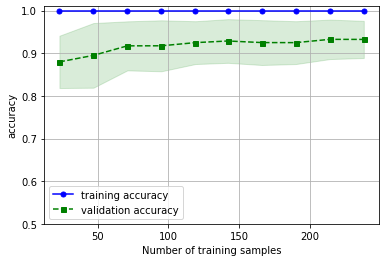

Logistic Regression - Learning Curve


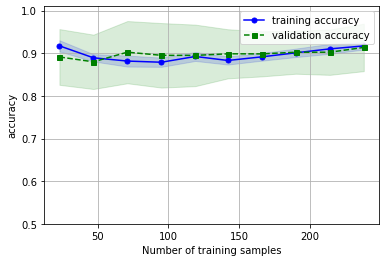

In [13]:
#PLOT LEARNING CURVE

print('Random Forest - Learning Curve')
plot_learning_curves(pipe_rdf)
print('Logistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)

In [14]:
#DEFINE GRIDSEARCH FUNCTION 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

def Gridsearch_cv(model, params):
    
    #CROSS-VALIDATION FUNCTION
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GRIDSEARCH CV
    gs_clf = GridSearchCV(model, params,cv=cv2)
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # USE BEST MODEL AND TEST DATA FOR FINAL EVALUATION
    y_pred = model.predict(x_test2)
    
    #IDENTIFY BEST PARAMETERS TO OPTIMIZE THE MODEL
    bestpara=str(gs_clf.best_params_)
        
    #OUTPUT  VALIDATION STATISTICS
    target_names=['Channel 1','Channel 2']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test2,y_pred))  
    print('\n',classification_report(y_test2,y_pred,target_names=target_names))
    
    #TREANSFORM THE INTO BINARY (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Channel1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    ChannelB1 =lb1.fit_transform(Channel1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #SETUP THE ROC CURVE
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(ChannelB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    
    #PLOT THE ROC CURVE
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Channel 1       0.96      0.90      0.92        48
   Channel 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


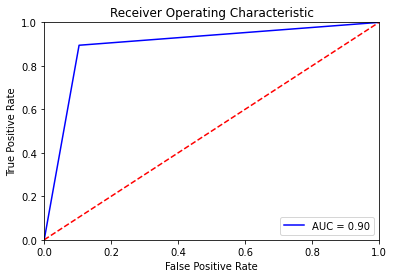


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=100)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2'}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Channel 1       0.96      0.90      0.92        48
   Channel 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


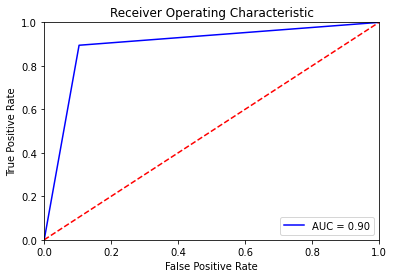

In [15]:
#RUN MODELS

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [16]:
#PREPARE MODELS 

from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

Model Evaluation - Recall Score
Random Forest 0.91 +/- 0.04
AdaBoost 0.89 +/- 0.05




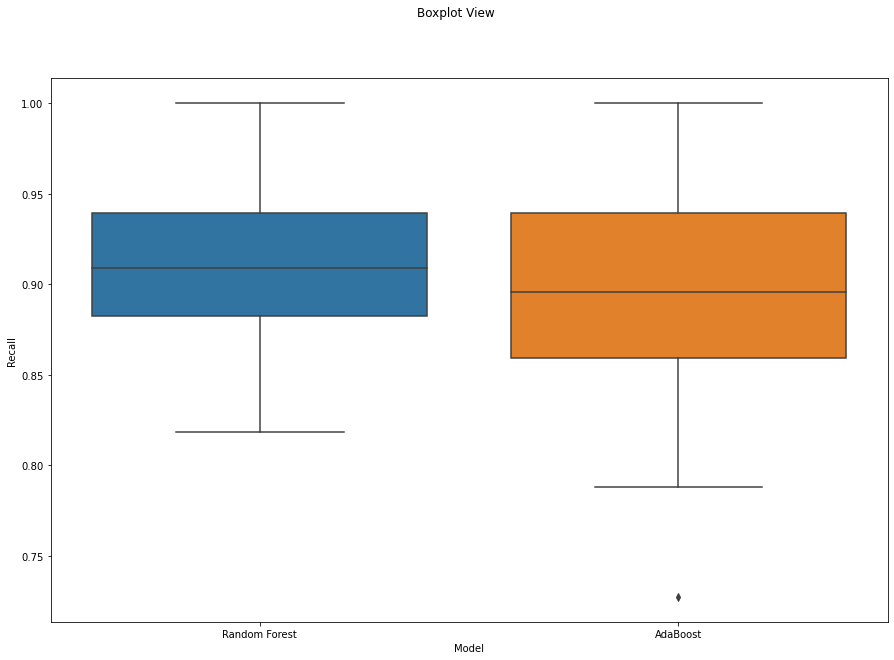

In [17]:
#MODEL ANALYSIS

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))

#MODEL EVALUATION
results=[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#BOXPLOT VIEW
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [18]:
#SCRIPT FOR MODELS

from sklearn.metrics import classification_report, confusion_matrix  

models2 ={'Random Forest':RandomForestClassifier(n_estimators=100,random_state=100),
          'AdaBoost':AdaBoostClassifier(random_state=100)}

for name, model in models2.items():
    model.fit(x_train_smt,y_train_smt)
    predict = model.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print('\n',confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: Random Forest

 [[43  5]
 [ 2 17]]
              precision    recall  f1-score   support

           1       0.96      0.90      0.92        48
           2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67


Estimator: AdaBoost

 [[44  4]
 [ 2 17]]
              precision    recall  f1-score   support

           1       0.96      0.92      0.94        48
           2       0.81      0.89      0.85        19

    accuracy                           0.91        67
   macro avg       0.88      0.91      0.89        67
weighted avg       0.91      0.91      0.91        67



In [19]:
#CREATE VOTING MODELS - Sklearn

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

model1 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators.append(('Random Forest', model1))

model2 = AdaBoostClassifier(random_state=100)
estimators.append(('AdaBoost', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'rec': 'recall',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train_smt,y_train_smt)
    x_2=sc.transform(x2)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, Y2, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))


Voting Model
RandomForestClassifier 0.89
AdaBoostClassifier 0.86
VotingClassifier 0.89
